In [3]:
!pip install statsmodels

In [4]:
!pip install seaborn

Cointegration for 3 variables

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the data
data = pd.read_csv("data3.csv")

# Convert the data to a pandas DataFrame with a datetime index
data.index = pd.date_range(start="1980", periods=len(data), freq="A")

# Select the variables for the Johansen test
y1 = data["FDI"]
y2 = data["govt debt"]
y3 = data["GDP"]

# Create a multivariate time series object
y = np.array([y1, y2, y3]).T

# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Print the Johansen test results
print("Johansen Test Results:")
print("Eigenvalues:", johansen_test.eig)
print("Trace statistic:", johansen_test.lr1)
print("Critical values (trace):", johansen_test.cvt)
print("Max eigenvalue statistic:", johansen_test.lr2)
print("Critical values (max eigenvalue):", johansen_test.cvm)


Johansen Test Results:
Eigenvalues: [0.51229959 0.28927355 0.08636204]
Trace statistic: [59.79181127 22.4530049   4.69668609]
Critical values (trace): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [37.33880637 17.75631881  4.69668609]
Critical values (max eigenvalue): [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [6]:
from statsmodels.tsa.vector_ar.vecm import select_order

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)


Optimal lag length based on AIC: 3


In [8]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np

# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Extract test results
trace_stat = johansen_test.lr1
critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

# Determine the cointegration rank
coint_rank = np.sum(trace_stat > critical_values_trace)

print("Cointegration Rank:", coint_rank)


Cointegration Rank: 3


VECM Model

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM

# Load your data into a Pandas DataFrame
df = pd.read_csv('data3.csv')

# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Print the summary of the VECM estimation
print(results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation FDI
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI           0.3964      0.128      3.105      0.002       0.146       0.647
L1.govt debt    -0.0507      0.024     -2.143      0.032      -0.097      -0.004
L1.GDP           0.0449      0.009      4.810      0.000       0.027       0.063
Det. terms outside the coint. relation & lagged endog. parameters for equation govt debt
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI          -0.7472      1.131     -0.660      0.509      -2.965       1.470
L1.govt debt     0.1530      0.210      0.730      0.466      -0.258       0.564
L1.GDP          -0.1855      0.083     -2.241      0.025      -0.348      -0.023
Det. terms outside

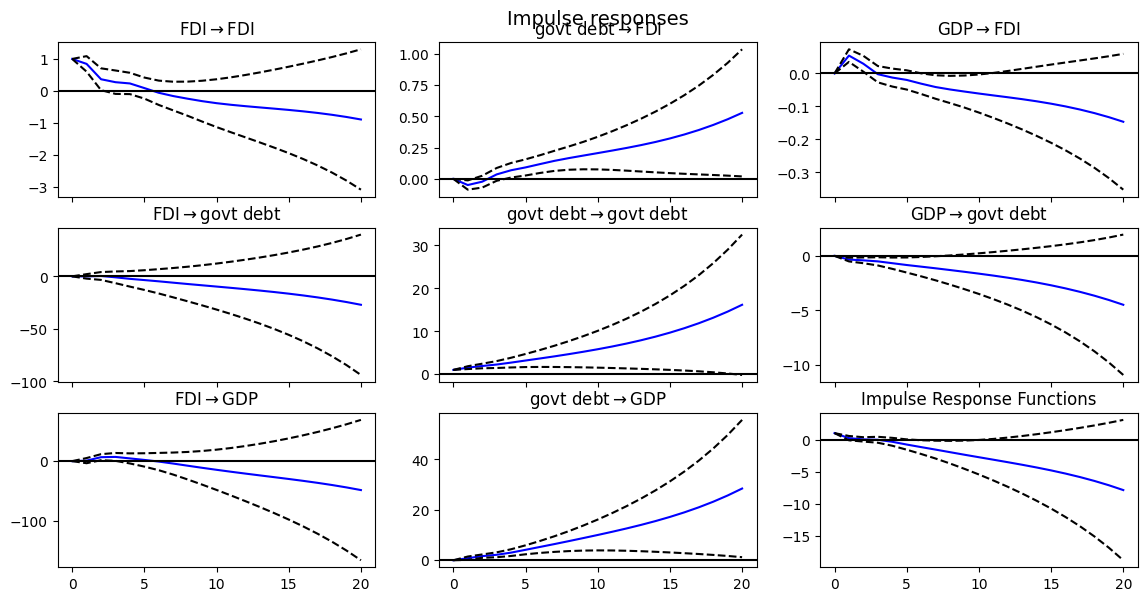

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM

# Load your data into a Pandas DataFrame
df = pd.read_csv('data3.csv')

# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Plot the impulse response functions
irf = results.irf(periods=20)
irf.plot(figsize=(12, 6))
plt.title("Impulse Response Functions")
plt.show()

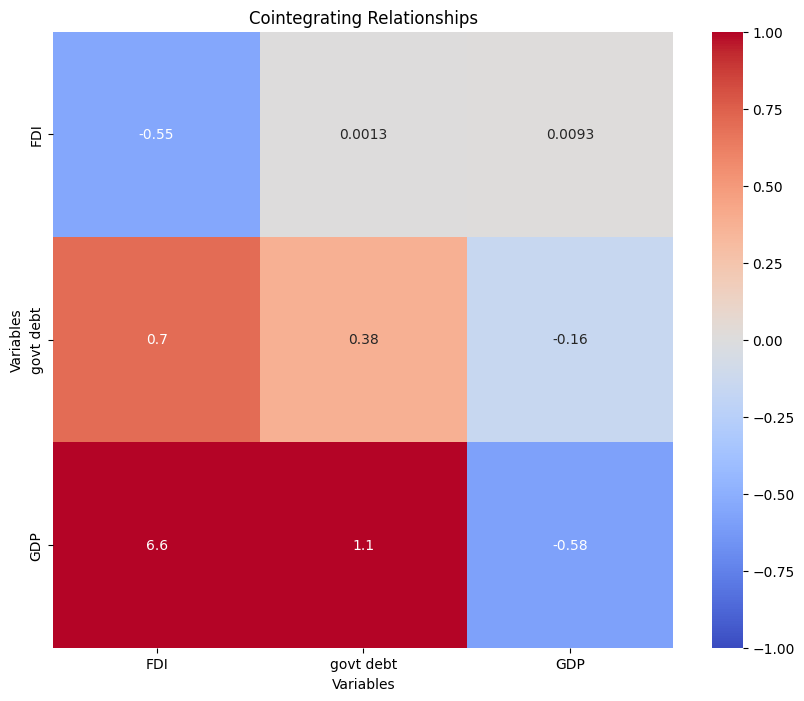

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
import seaborn as sns


# Extract the alpha and beta matrices
alpha = results.alpha
beta = results.beta

# Compute the cointegrating relationships
coint_rel = np.dot(alpha, beta)

# Create a DataFrame for the cointegrating relationships
coint_rel_df = pd.DataFrame(coint_rel, columns=y.columns, index=y.columns)

# Plot the cointegrating relationships as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coint_rel_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cointegrating Relationships")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()